Starting Confusion Matrix Mini-Project...

--- Step 1: Data Loading and Initial Exploration ---
Dataset loaded: Breast Cancer Wisconsin (Diagnostic)
Number of samples: 569
Number of features: 30
Target classes: 0 (Malignant), 1 (Benign)

First 5 rows of features (X):
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0

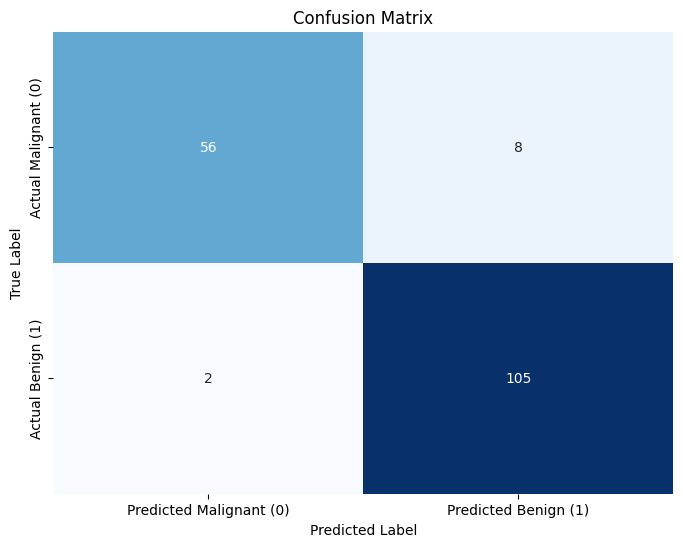


--- Understanding the Confusion Matrix Components ---
True Negatives (TN): 56 (Correctly predicted Malignant)
False Positives (FP): 8 (Incorrectly predicted Benign when actually Malignant - Type I Error)
False Negatives (FN): 2 (Incorrectly predicted Malignant when actually Benign - Type II Error)
True Positives (TP): 105 (Correctly predicted Benign)

--- Step 6: Derived Metrics Calculation ---
Accuracy: 0.9415
Precision (for Benign class): 0.9292
Recall (for Benign class): 0.9813
F1-Score (for Benign class): 0.9545

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.88      0.92        64
      benign       0.93      0.98      0.95       107

    accuracy                           0.94       171
   macro avg       0.95      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171


Confusion Matrix Mini-Project completed!
You now have a practical understanding of how to interpret classification model perf

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

print("Starting Confusion Matrix Mini-Project...")

# --- STEP 1: Data Loading and Initial Exploration ---
print("\n--- Step 1: Data Loading and Initial Exploration ---")
# Load the Breast Cancer Wisconsin (Diagnostic) dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target) # 0 for malignant, 1 for benign

print("Dataset loaded: Breast Cancer Wisconsin (Diagnostic)")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print("Target classes: 0 (Malignant), 1 (Benign)")

print("\nFirst 5 rows of features (X):")
print(X.head())
print("\nFirst 5 values of target (y):")
print(y.head())
print("\nTarget distribution:")
print(y.value_counts())

# --- STEP 2: Data Preprocessing & Splitting ---
print("\n--- Step 2: Data Preprocessing & Splitting ---")
# Split the dataset into training and testing sets
# test_size=0.3 means 30% of the data will be used for testing
# random_state ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y # stratify ensures similar class distribution in splits
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# --- STEP 3: Model Training ---
print("\n--- Step 3: Model Training ---")
# Initialize a Logistic Regression model
# solver='liblinear' is a good choice for small datasets
# random_state for reproducibility
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)
print("Logistic Regression model trained successfully.")

# --- STEP 4: Predictions ---
print("\n--- Step 4: Predictions ---")
# Make predictions on the test set
y_pred = model.predict(X_test)
print("Predictions made on the test set.")

# --- STEP 5: Confusion Matrix Calculation and Visualization ---
print("\n--- Step 5: Confusion Matrix Calculation and Visualization ---")

# Calculate the Confusion Matrix
# The order of parameters is (true_labels, predicted_labels)
cm = confusion_matrix(y_test, y_pred)
print("\nRaw Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Malignant (0)', 'Predicted Benign (1)'],
            yticklabels=['Actual Malignant (0)', 'Actual Benign (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\n--- Understanding the Confusion Matrix Components ---")
# For binary classification, typically:
# Positive Class: 1 (Benign) - what we are often trying to detect
# Negative Class: 0 (Malignant) - the other class

# True Negatives (TN): Top-left (cm[0,0])
# Correctly predicted negative (Actual Malignant, Predicted Malignant)
TN = cm[0, 0]
print(f"True Negatives (TN): {TN} (Correctly predicted Malignant)")

# False Positives (FP): Top-right (cm[0,1]) - Type I Error
# Incorrectly predicted positive (Actual Malignant, Predicted Benign)
FP = cm[0, 1]
print(f"False Positives (FP): {FP} (Incorrectly predicted Benign when actually Malignant - Type I Error)")

# False Negatives (FN): Bottom-left (cm[1,0]) - Type II Error
# Incorrectly predicted negative (Actual Benign, Predicted Malignant)
FN = cm[1, 0]
print(f"False Negatives (FN): {FN} (Incorrectly predicted Malignant when actually Benign - Type II Error)")

# True Positives (TP): Bottom-right (cm[1,1])
# Correctly predicted positive (Actual Benign, Predicted Benign)
TP = cm[1, 1]
print(f"True Positives (TP): {TP} (Correctly predicted Benign)")

# --- STEP 6: Derived Metrics Calculation ---
print("\n--- Step 6: Derived Metrics Calculation ---")

# Accuracy: (TP + TN) / (TP + TN + FP + FN)
# Overall correctness of the model.
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Precision: TP / (TP + FP)
# Of all predicted positives, how many were actually positive?
# Important when the cost of False Positives is high (e.g., spam detection).
precision = precision_score(y_test, y_pred)
print(f"Precision (for Benign class): {precision:.4f}")

# Recall (Sensitivity/True Positive Rate): TP / (TP + FN)
# Of all actual positives, how many did the model correctly identify?
# Important when the cost of False Negatives is high (e.g., disease detection).
recall = recall_score(y_test, y_pred)
print(f"Recall (for Benign class): {recall:.4f}")

# F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
# Harmonic mean of Precision and Recall. Balances both.
f1 = f1_score(y_test, y_pred)
print(f"F1-Score (for Benign class): {f1:.4f}")

# Classification Report: Provides precision, recall, f1-score for each class and overall accuracy.
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

print("\nConfusion Matrix Mini-Project completed!")
print("You now have a practical understanding of how to interpret classification model performance.")